In [52]:
from iconclass import init
import os
import json
import matplotlib.pyplot as plt
# Import PIL for image processing
from PIL import Image
import pandas as pd
from tqdm import tqdm

In [53]:
folder_path = "../../../IconclassTest/"

In [54]:
data = json.loads(open(os.path.join(folder_path, "data.json")).read())
images_path = list(data.keys())
print(f"Number of images : {len(images_path)}")

Number of images : 87744


In [55]:
for lang in ("en", "fr", "nl"):
    buf = []
    print(f"Processing {lang} ...")
    for filename in (
        f"txt_{lang}_0_1.txt",
        f"txt_{lang}_2_3.txt",
        f"txt_{lang}_4.txt",
        f"txt_{lang}_5_6_7_8.txt",
        f"txt_{lang}_9.txt",
        f"txt_{lang}_keys.txt",
    ):
        url = f"https://raw.githubusercontent.com/iconclass/data/main/txt/{lang}/{filename}"
        print(url)
    print()

Processing en ...
https://raw.githubusercontent.com/iconclass/data/main/txt/en/txt_en_0_1.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/en/txt_en_2_3.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/en/txt_en_4.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/en/txt_en_5_6_7_8.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/en/txt_en_9.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/en/txt_en_keys.txt

Processing fr ...
https://raw.githubusercontent.com/iconclass/data/main/txt/fr/txt_fr_0_1.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/fr/txt_fr_2_3.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/fr/txt_fr_4.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/fr/txt_fr_5_6_7_8.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/fr/txt_fr_9.txt
https://raw.githubusercontent.com/iconclass/data/main/txt/fr/txt_fr_keys.txt

Processing nl ...
https://raw.githubusercontent.

In [56]:
ic = init()
a = ic["53A2"]

print(a)
print(repr(a))
print(a())
print(a('de'))

for child in a:
    print(child('it'))

for p in a.path():
    print(repr(p))

53A2
53A2 Perseverance, Resolution, Determination; 'Perseveranza' (Ripa)
Perseverance, Resolution, Determination; 'Perseveranza' (Ripa)
Beharrlichkeit, Unbeirrbarkeit, Zielstrebigkeit; Ripa: Perseveranza
costanza, tenacia; 'Costanza', 'Tenacità' (Ripa)
stabilità, fermezza; 'Fermezza, 'Stabilimento', 'Stabilità' (Ripa)
perseveranza, risoluzione, determinazione; 'Perseveranza' (Ripa) (+ variante)
perseveranza, risoluzione, determinazione; 'Perseveranza' (Ripa) (+ personificazione)
perseveranza, risoluzione, determinazione; 'Perseveranza' (Ripa) (+ scena allegorica, p.es. due o più personificazioni implicate in un'azione)
perseveranza, risoluzione, determinazione; 'Perseveranza' (Ripa) (+ rappresentazione simbolica di concetti)
perseveranza, risoluzione, determinazione; 'Perseveranza' (Ripa) (+ rappresentazione emblematica di concetti)
perseveranza, risoluzione, determinazione; 'Perseveranza' (Ripa) (+ 'exemplum', rappresentazione di evento (storico) esemplare)
perseveranza, risoluzione, 

In [57]:
def check_for_nl():
    ic_nl = ic["11B"]
    en_val = ic_nl('en')
    nl_val = ic_nl('nl')
    print(f"English: {en_val}")
    print(f"Dutch: {nl_val}")
    assert len(nl_val) > 0, "Dutch value is empty"

check_for_nl()

English: the Holy Trinity, 'Trinitas coelestis'; Father, Son and Holy Ghost ~ Christian religion
Dutch: Drieëenheid


In [58]:
def openImage(image_path):
    path = os.path.join(folder_path, image_path)
    image = Image.open(open(path, "rb"))
    return image

def getObjects_in_lang(objects, lang):
    objects_in_lang = []
    prc = 0
    presentBin = ""
    for obj in objects:
        try:
            ic_obj = ic[str(obj)]
            ic_obj_lang = ic_obj(lang)
            if ic_obj_lang:
                objects_in_lang.append(ic_obj_lang)
                prc += 1
                presentBin += "1"
            else:
                raise ValueError("No value found")
        except:
            presentBin += "0"
            continue

    return objects_in_lang, prc/len(objects), presentBin

In [59]:
def formatObjects(objects):
    return "\n".join(objects)

In [60]:
def presentData(index):
    image_path = images_path[index]

    dataForIndex = data[image_path]

    objects_in_EN, _, _ = getObjects_in_lang(dataForIndex, "en")
    objects_in_FR, _, _ = getObjects_in_lang(dataForIndex, "fr")
    objects_in_NL, _, _ = getObjects_in_lang(dataForIndex, "nl")
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(openImage(image_path))
    # Add the text to the second subplot
    axs[1].text(0.5, 0.9, f"EN\n{formatObjects(objects_in_EN)}", fontsize=12, ha='center', va='center')
    axs[1].text(0.5, 0.5, f"FR\n{formatObjects(objects_in_FR)}", fontsize=12, ha='center', va='center')
    axs[1].text(0.5, 0.1, f"NL\n{formatObjects(objects_in_NL)}", fontsize=12, ha='center', va='center')
    plt.axis('off')
    plt.show()

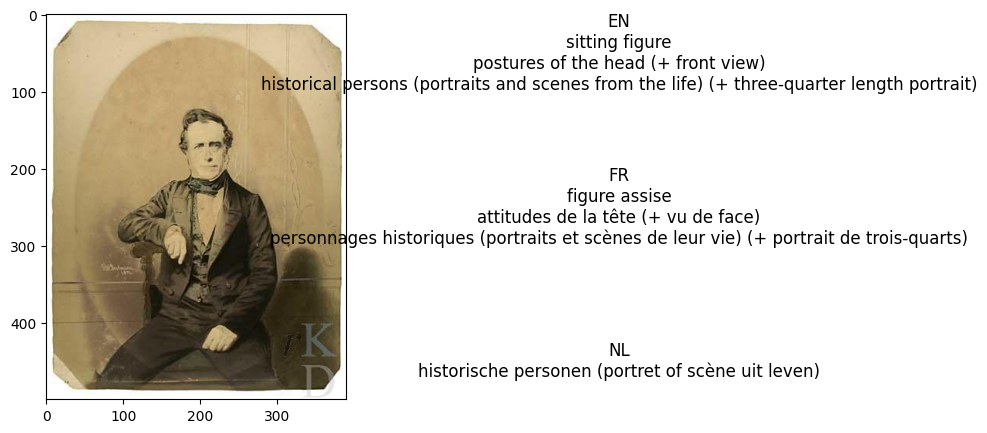

In [61]:
presentData(0)

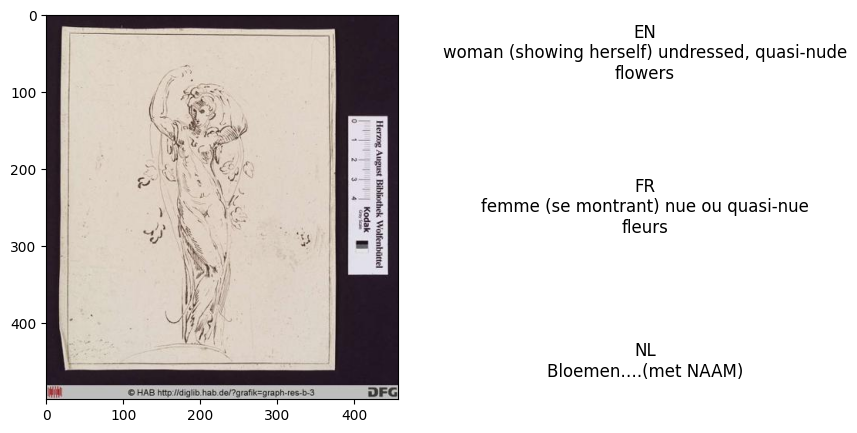

In [62]:
presentData(1)

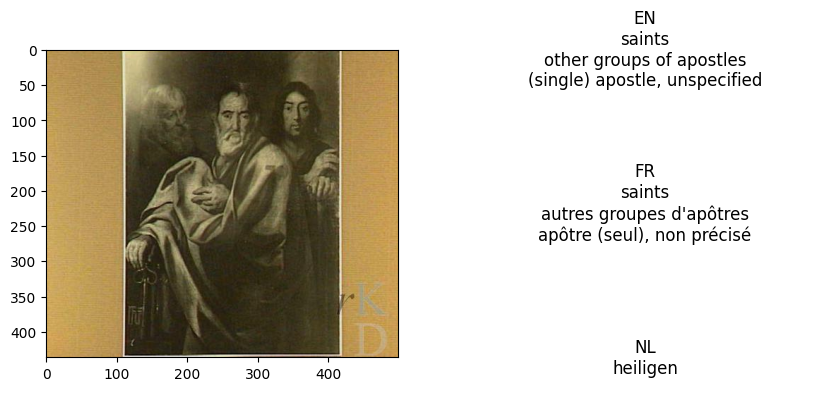

In [63]:
presentData(2)

In [64]:
def getCaption(objects):
    return set(objects)

print(getCaption(["11A", "11B", "11C"]))
print(getCaption(["11A", "11C", "11B"]))

{'11A', '11B', '11C'}
{'11A', '11B', '11C'}


In [65]:
captions = pd.DataFrame(columns=["image_path", "caption_en", "caption_fr", "caption_nl", "prc_EN", "prc_FR", "prc_NL"])

export_path = "../../../IconclassTest/captions_list.csv"

if True:
    en_captions = []
    fr_captions = []
    nl_captions = []
    prc_ENs = []
    prc_FRs = []
    prc_NLs = []
    presentBin_ENs = []
    presentBin_FRs = []
    presentBin_NLs = []

    for index in tqdm(range(len(images_path))):
            
        image_path = images_path[index]
        dataForIndex = data[image_path]

        objects_in_EN, prc_EN, presentBin_EN = getObjects_in_lang(dataForIndex, "en")
        objects_in_FR, prc_FR, presentBin_FR = getObjects_in_lang(dataForIndex, "fr")
        objects_in_NL, prc_NL, presentBin_NL = getObjects_in_lang(dataForIndex, "nl")

        caption_en = getCaption(objects_in_EN)
        caption_fr = getCaption(objects_in_FR)
        caption_nl = getCaption(objects_in_NL)

        # Add
        en_captions.append(caption_en)
        fr_captions.append(caption_fr)
        nl_captions.append(caption_nl)

        prc_ENs.append(prc_EN)
        prc_FRs.append(prc_FR)
        prc_NLs.append(prc_NL)

        presentBin_ENs.append(presentBin_EN)
        presentBin_FRs.append(presentBin_FR)
        presentBin_NLs.append(presentBin_NL)

    captions = pd.DataFrame({
        "image_path": images_path,
        "caption_en": en_captions,
        "caption_fr": fr_captions,
        "caption_nl": nl_captions,
        "prc_EN": prc_ENs,
        "prc_FR": prc_FRs,
        "prc_NL": prc_NLs,
        "presentBin_EN": presentBin_ENs,
        "presentBin_FR": presentBin_FRs,
        "presentBin_NL": presentBin_NLs,
    })

    captions.to_csv(export_path, index=False, sep=";")
else:
    captions = pd.read_csv(export_path, sep=";")

100%|██████████| 87744/87744 [00:15<00:00, 5570.52it/s]


In [66]:
captions

,image_path,caption_en,caption_fr,caption_nl,prc_EN,prc_FR,prc_NL,presentBin_EN,presentBin_FR,presentBin_NL
0,IIHIM_1956438510.jpg,"{postures of the head (+ front view), sitting ...","{attitudes de la tête (+ vu de face), figure a...",{historische personen (portret of scène uit le...,0.6,0.6,0.200000,11100,11100,00100
1,IIHIM_-859728949.jpg,"{flowers, woman (showing herself) undressed, q...","{femme (se montrant) nue ou quasi-nue, fleurs}",{Bloemen….(met NAAM)},1.0,1.0,0.500000,11,11,01
2,IIHIM_1207680098.jpg,"{other groups of apostles, (single) apostle, u...","{apôtre (seul), non précisé, autres groupes d'...",{heiligen},1.0,1.0,0.333333,111,111,100
3,IIHIM_-743518586.jpg,"{'Mater Dolorosa', 'trompe l'oeil', 'Mater Dol...","{nature morte d'objets en trompe-l'oeil, 'Mate...",{},1.0,1.0,0.000000,111,111,000
4,IIHIM_-776578792.jpg,"{mountains, birds, river, landscapes, fowl (co...","{rivière, fleuve, montagnes, oiseaux, paysage,...","{Vogels, Bergen, Landschap -HH- idelaal landsc...",1.0,1.0,0.666667,111111,111111,101110
...,...,...,...,...,...,...,...,...,...,...
87739,folger_ill_fac073964.jpg,"{armorial bearing, heraldry}","{armoiries, héraldique}",{},1.0,1.0,0.000000,1,1,0
87740,IIHIM_1709137433.jpg,"{standing figure, head turned to the right, hi...","{figure debout, tête tournée vers la droite, p...",{historische personen (portret of scène uit le...,0.6,0.6,0.200000,11100,11100,00100
87741,IIHIM_-856738929.jpg,"{traffic and transport, riding a horse, ass, o...","{monter à cheval, sur un âne, un mulet; cavali...","{dorp, Landschap -HH- idelaal landschap, verke...",1.0,1.0,0.714286,1111111,1111111,1111100
87742,IIHIM_1052728781.jpg,"{beach, ships (in general), city-view in gener...",{vue de ville et paysage avec constructions fa...,"{Stadsgezicht in het algemeen; ‘veduta’, Stran...",1.0,1.0,0.428571,1111111,1111111,1110000


# Let's only keep the images that have the same objects described in the three languages (EN, FR and NL)

In [67]:
captions = captions[captions["presentBin_EN"] == captions["presentBin_FR"]]
captions = captions[captions["presentBin_EN"] == captions["presentBin_NL"]]
captions = captions[captions["prc_EN"] > 0]
captions

,image_path,caption_en,caption_fr,caption_nl,prc_EN,prc_FR,prc_NL,presentBin_EN,presentBin_FR,presentBin_NL
9,IIHIM_1024643936.jpg,{historical persons (portraits and scenes from...,{personnages historiques (portraits et scènes ...,{historische personen (portret of scène uit le...,0.5,0.5,0.5,10,10,10
36,IIHIM_-878844961.jpg,"{city-view, and landscape with man-made constr...",{vue de ville et paysage avec constructions fa...,{stedelijke architectuur; bouwwerken; woningen...,1.0,1.0,1.0,1111,1111,1111
40,IIHIM_-739492654.jpg,{insects},{insectes},{Insekten (met NAAM)},1.0,1.0,1.0,1,1,1
42,IIHIM_-176464304.jpg,{historical persons (portraits and scenes from...,{personnages historiques (portraits et scènes ...,{historische personen (portret of scène uit le...,1.0,1.0,1.0,1,1,1
45,bsb00030511_569.jpg,{miracles of Christ ~ healing the sick},{les miracles de Jésus-Christ ~ guérison de ma...,{wonderen van Christus - genezing},1.0,1.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
87685,IIHIM_RIJKS_-353945642.jpg,"{landscapes (+ landscape with figures, staffag...","{paysage (+ paysage avec figures, fabriques), ...","{Monument, standbeeld, Landschap -HH- idelaal ...",1.0,1.0,1.0,11,11,11
87707,IIHIM_-386026175.jpg,"{angels, an angel meets Hagar at the fountain ...","{anges, un ange apparaît et révèle un puits d'...",{een engel treft Hagar aan bij de waterbron aa...,1.0,1.0,1.0,1111,1111,1111
87713,bsb00008182_127.jpg,"{Christ's arrest, trial, and torture}","{l'arrestation, le procès et le supplice de Jé...","{arrestatie, rechtspraak en marteling}",1.0,1.0,1.0,1,1,1
87714,IIHIM_RIJKS_-88745678.jpg,"{siege, position war}","{siège, guerre de siège}",{overwinning},1.0,1.0,1.0,1,1,1


In [68]:
cap_en = captions["caption_en"].to_list()
cap_fr = captions["caption_fr"].to_list()
cap_nl = captions["caption_nl"].to_list()

def removeDuplicatesFromListOfSets(list_of_sets):
    unique_sets = []
    for s in list_of_sets:
        if s not in unique_sets:
            unique_sets.append(s)
    return unique_sets

cap_en = removeDuplicatesFromListOfSets(cap_en)
cap_fr = removeDuplicatesFromListOfSets(cap_fr)
cap_nl = removeDuplicatesFromListOfSets(cap_nl)

nb_unique_en = len(cap_en)
nb_unique_fr = len(cap_fr)
nb_unique_nl = len(cap_nl)
print(f"Number of unique captions in English: {nb_unique_en}")
print(f"Number of unique captions in French: {nb_unique_fr}")
print(f"Number of unique captions in Dutch: {nb_unique_nl}")

Number of unique captions in English: 2046
Number of unique captions in French: 2046
Number of unique captions in Dutch: 1889


# I will only keep the unique captions in Dutch, then I will remove any caption that is not unique in the three languages at once

In [69]:
# Keep only the rows with unique captions in Dutch
captions_nl = captions.drop_duplicates(subset=["caption_nl"])
captions_nl

,image_path,caption_en,caption_fr,caption_nl,prc_EN,prc_FR,prc_NL,presentBin_EN,presentBin_FR,presentBin_NL
9,IIHIM_1024643936.jpg,{historical persons (portraits and scenes from...,{personnages historiques (portraits et scènes ...,{historische personen (portret of scène uit le...,0.5,0.5,0.5,10,10,10
36,IIHIM_-878844961.jpg,"{city-view, and landscape with man-made constr...",{vue de ville et paysage avec constructions fa...,{stedelijke architectuur; bouwwerken; woningen...,1.0,1.0,1.0,1111,1111,1111
40,IIHIM_-739492654.jpg,{insects},{insectes},{Insekten (met NAAM)},1.0,1.0,1.0,1,1,1
45,bsb00030511_569.jpg,{miracles of Christ ~ healing the sick},{les miracles de Jésus-Christ ~ guérison de ma...,{wonderen van Christus - genezing},1.0,1.0,1.0,1,1,1
57,IIHIM_483208950.jpg,{Classical Mythology and Ancient History},{Mythologie et Histoire de l'Antiquité Classique},{Klassieke mythologie en Oude Geschiedenis},1.0,1.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
87482,IIHIM_1681689522.jpg,"{landscapes, trees, shadow}","{ombre, paysage, arbres}","{Bomen….(met NAAM), Landschap -HH- idelaal lan...",1.0,1.0,1.0,111,111,111
87588,IIHIM_1664015051.jpg,{stars},{les étoiles},{De sterren},1.0,1.0,1.0,1,1,1
87678,IIHIM_1033792155.jpg,"{village, winter ~ human activities (the four ...","{village, hiver ~ activités humaines (les quat...","{Winter, Landschap, voorstellend Winter, dorp}",1.0,1.0,1.0,111,111,111
87685,IIHIM_RIJKS_-353945642.jpg,"{landscapes (+ landscape with figures, staffag...","{paysage (+ paysage avec figures, fabriques), ...","{Monument, standbeeld, Landschap -HH- idelaal ...",1.0,1.0,1.0,11,11,11


In [70]:
cap_en = captions_nl["caption_en"].to_list()
cap_fr = captions_nl["caption_fr"].to_list()
cap_nl = captions_nl["caption_nl"].to_list()

captions_nl__unique_en = removeDuplicatesFromListOfSets(cap_en)
captions_nl__unique_fr = removeDuplicatesFromListOfSets(cap_fr)
captions_nl__unique_nl = removeDuplicatesFromListOfSets(cap_nl)

captions_nl__unique_en = len(captions_nl__unique_en)
captions_nl__unique_fr = len(captions_nl__unique_fr)
captions_nl__unique_nl = len(captions_nl__unique_nl)

print(f"Number of unique captions in English: {captions_nl__unique_en}")
print(f"Number of unique captions in French: {captions_nl__unique_fr}")
print(f"Number of unique captions in Dutch: {captions_nl__unique_nl}")

Number of unique captions in English: 1889
Number of unique captions in French: 1889
Number of unique captions in Dutch: 1889


# This subset seems interesting ! We do not have duplicates that would "blur" the metrics
## Let's get all the image_path that contain a specific object

In [71]:
captions_nl.head(1)

,image_path,caption_en,caption_fr,caption_nl,prc_EN,prc_FR,prc_NL,presentBin_EN,presentBin_FR,presentBin_NL
9,IIHIM_1024643936.jpg,{historical persons (portraits and scenes from...,{personnages historiques (portraits et scènes ...,{historische personen (portret of scène uit le...,0.5,0.5,0.5,10,10,10


In [72]:
def get_object_to_paths(lang):
    object_to_paths = {}
    captions_lang = captions_nl[["image_path", f"caption_{lang}"]]
    for _, row in captions_lang.iterrows():
        image_path = row["image_path"]
        objects = row[f"caption_{lang}"]
        for object in objects:
            if object not in object_to_paths:
                object_to_paths[object] = []
            object_to_paths[object].append(image_path)
    
    return pd.DataFrame(object_to_paths.items(), columns=["object", "paths"])

object_to_paths_en = get_object_to_paths("en")
object_to_paths_fr = get_object_to_paths("fr")
object_to_paths_nl = get_object_to_paths("nl")
object_to_paths_fr

,object,paths
0,personnages historiques (portraits et scènes d...,"[IIHIM_1024643936.jpg, IIHIM_-52509843.jpg, II..."
1,vue de ville et paysage avec constructions faç...,"[IIHIM_-878844961.jpg, IIHIM_-1580678625.jpg, ..."
2,le soldat; la vie soldatesque,"[IIHIM_-878844961.jpg, IIHIM_RIJKS_-317094826...."
3,arbres,"[IIHIM_-878844961.jpg, IIHIM_-835507554.jpg, I..."
4,architecture civique; édifices; résidences,"[IIHIM_-878844961.jpg, IIHIM_RIJKS_-1824072957..."
...,...,...
840,projections modernes ~ carte du monde (+ varia...,[folger_ill_pic066186.jpg]
841,Noé construit l'arche,[biblia_sacra_20110822163.jpg]
842,fable (CERVUS IN AQUA INSPICIENS),[folger_ill_pic076515.jpg]
843,fable (THE STAG LOOKING INTO THE WATER),[folger_ill_pic076515.jpg]


# Let's tokenize them to see how long they are

In [73]:
import torch
from transformers import CLIPProcessor, CLIPModel
import transformers

In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [75]:
base_name = "openai/clip-vit-base-patch32"
processor = CLIPProcessor.from_pretrained(base_name)
model = CLIPModel.from_pretrained(base_name).to(device)
tokenizer = transformers.AutoTokenizer.from_pretrained(base_name)

In [76]:
def get_tokenized_length(text):
    return len(tokenizer.encode(text))

object_to_paths_en["object_tokens"] = object_to_paths_en["object"].apply(get_tokenized_length)
object_to_paths_fr["object_tokens"] = object_to_paths_fr["object"].apply(get_tokenized_length)
object_to_paths_nl["object_tokens"] = object_to_paths_nl["object"].apply(get_tokenized_length)

# Remove any row that has one of its caption being too long

In [77]:
index_object_to_paths_en_respecting_75_tokens = set(object_to_paths_en[object_to_paths_en["object_tokens"] <= 75].index)
index_object_to_paths_fr_respecting_75_tokens = set(object_to_paths_fr[object_to_paths_fr["object_tokens"] <= 75].index)
index_object_to_paths_nl_respecting_75_tokens = set(object_to_paths_nl[object_to_paths_nl["object_tokens"] <= 75].index)
intersection_indexes = index_object_to_paths_en_respecting_75_tokens.intersection(index_object_to_paths_fr_respecting_75_tokens).intersection(index_object_to_paths_nl_respecting_75_tokens)
len(intersection_indexes)

741

In [78]:
object_to_paths_en = object_to_paths_en.loc[list(intersection_indexes)]
object_to_paths_fr = object_to_paths_fr.loc[list(intersection_indexes)]
object_to_paths_nl = object_to_paths_nl.loc[list(intersection_indexes)]
object_to_paths_en = object_to_paths_en.reset_index(drop=True)
object_to_paths_fr = object_to_paths_fr.reset_index(drop=True)
object_to_paths_nl = object_to_paths_nl.reset_index(drop=True)
len(object_to_paths_en), len(object_to_paths_fr), len(object_to_paths_nl)

(741, 741, 741)

In [89]:
# Save it to CSV files
export_path_testing = "../../../IconclassTest_Exploded/"
object_to_paths_en.to_csv(os.path.join(export_path_testing, "object_to_paths_en.csv"), index=False)
object_to_paths_fr.to_csv(os.path.join(export_path_testing, "object_to_paths_fr.csv"), index=False)
object_to_paths_nl.to_csv(os.path.join(export_path_testing, "object_to_paths_nl.csv"), index=False)

In [80]:
merged_df = pd.concat([object_to_paths_en, object_to_paths_fr, object_to_paths_nl], axis=0)
images_paths = merged_df["paths"]
images_paths

0      [IIHIM_1024643936.jpg, IIHIM_-52509843.jpg, II...
1      [IIHIM_-878844961.jpg, IIHIM_-1580678625.jpg, ...
2      [IIHIM_-878844961.jpg, IIHIM_RIJKS_-317094826....
3      [IIHIM_-878844961.jpg, IIHIM_RIJKS_-1824072957...
4      [IIHIM_-878844961.jpg, IIHIM_-835507554.jpg, I...
                             ...                        
736                           [folger_ill_pic066186.jpg]
737                       [biblia_sacra_20110822163.jpg]
738                           [folger_ill_pic076515.jpg]
739                           [folger_ill_pic076515.jpg]
740                         [IIHIM_RIJKS_1996520819.jpg]
Name: paths, Length: 2223, dtype: object

In [81]:
# Copy all the image in captions_nl into another folder
import shutil
import os

unique_paths = set()
for image_paths_list in merged_df["paths"]:
    for image_path in image_paths_list:
        unique_paths.add(image_path)
print(f"Number of images to copy: {len(unique_paths)}")

for image_path in tqdm(unique_paths):
    # Does the image exist in the folder?
    source = os.path.join(folder_path, image_path)
    dest = os.path.join(export_path_testing, image_path)
    if os.path.exists(dest):
        continue
    else:
        # Copy the image to the new folder
        shutil.copy(source, dest)

Number of images to copy: 1889


100%|██████████| 1889/1889 [00:00<00:00, 25526.74it/s]


In [82]:
# Check that all the images are copied
for image_path in unique_paths:
    if not os.path.exists(os.path.join(export_path_testing, image_path)):
        print(f"{image_path} not found.")